# Keras教程 Happy House 

In [2]:
import numpy as np

from kt_utils import * 


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.
/home/jun.liang/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


not happy


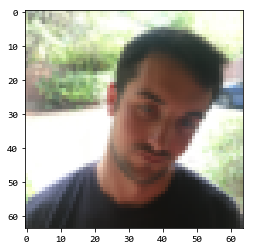

happy


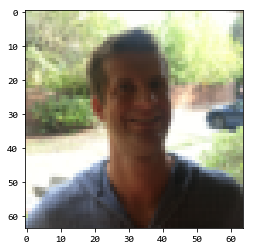

happy


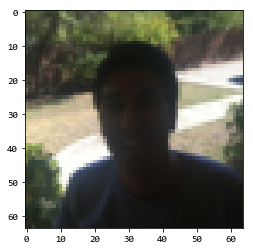

happy


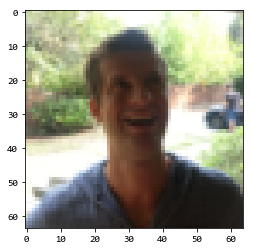

happy


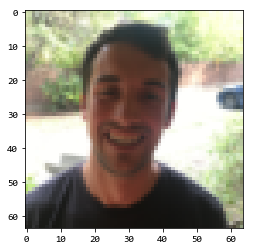

happy


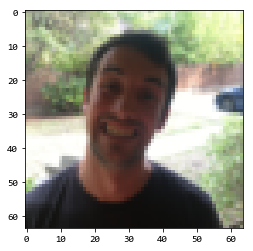

not happy


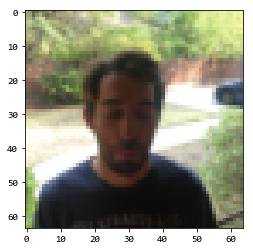

not happy


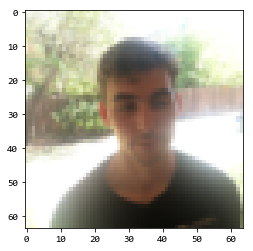

not happy


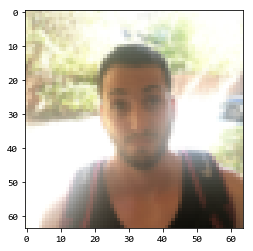

happy


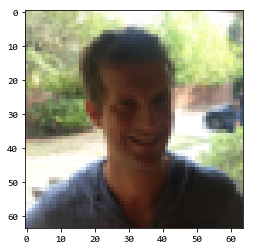

In [18]:
for idx in range(10):
    print("happy" if  np.squeeze(Y_train_orig)[idx]==1 else "not happy")
    imshow(X_train_orig[idx])
    plt.show()
    

### 建模

In [21]:
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format("channels_last")

import pydot


In [34]:
def HayppyModel(input_shape):
    X_input=Input(input_shape)
    print(X_input)
    
    X=Conv2D(8,(4,4),strides=(1,1),padding='same',name='conv0')(X_input)
    X=BatchNormalization(axis=3,name='bn0')(X)
    X=Activation('relu')(X)
    
    X=MaxPooling2D((8,8),strides=(8,8),name='max_pool',padding='same')(X)
    
    X=Conv2D(16,(2,2),strides=(1,1),padding='same',name='conv1')(X)
    X=BatchNormalization(axis=3,name='bn1')(X)
    X=Activation('relu')(X)
    
    X=Flatten()(X)
    X=Dense(1,activation='sigmoid',name='fc')(X)
    
    model=Model(inputs=X_input,outputs=X,name='HappyModel')
    return model
    

    
    
    
    
    
    


In [35]:
happyModel=HayppyModel(X_train.shape[1:])

Tensor("input_4:0", shape=(?, 64, 64, 3), dtype=float32)


In [37]:
happyModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
happyModel.fit(x=X_train,y=Y_train,epochs=40,batch_size=32)

Epoch 1/40
600/600 [==============================] - 0s - loss: 0.1457 - acc: 0.9633     
Epoch 2/40
600/600 [==============================] - 0s - loss: 0.1329 - acc: 0.9667     
Epoch 3/40
600/600 [==============================] - 0s - loss: 0.1185 - acc: 0.9767     
Epoch 4/40
600/600 [==============================] - 0s - loss: 0.1098 - acc: 0.9783     
Epoch 5/40
600/600 [==============================] - 0s - loss: 0.1093 - acc: 0.9750     
Epoch 6/40
600/600 [==============================] - 0s - loss: 0.0999 - acc: 0.9800     
Epoch 7/40
600/600 [==============================] - 0s - loss: 0.0925 - acc: 0.9833     
Epoch 8/40
600/600 [==============================] - 0s - loss: 0.0865 - acc: 0.9800     
Epoch 9/40
600/600 [==============================] - 0s - loss: 0.0790 - acc: 0.9867     
Epoch 10/40
600/600 [==============================] - 0s - loss: 0.0736 - acc: 0.9867     
Epoch 11/40
600/600 [==============================] - 0s - loss: 0.0687 - acc: 0.9833   

In [44]:
happyModel.evaluate(x=X_train,y=Y_train)

576/600 [===========================>..] - ETA: 0s

[0.018697057316700617, 0.9933333333333333]

In [45]:
happyModel.evaluate(x=X_test,y=Y_test)

 32/150 [=====>........................] - ETA: 0s

[0.07540311535199483, 0.9733333396911621]

In [47]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 8)         392       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 8)         32        
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 8, 8, 8)           0         
_________________________________________________________________
conv1 (Conv2D)               (None, 8, 8, 16)          528       
_________________________________________________________________
bn1 (BatchNormalization)     (None, 8, 8, 16)          64        
__________

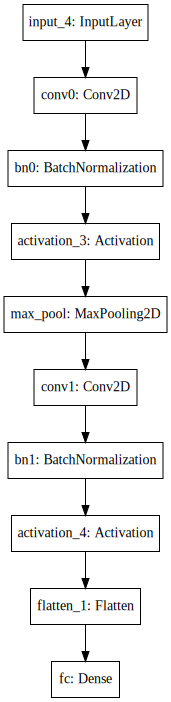

In [48]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

[[1.]]


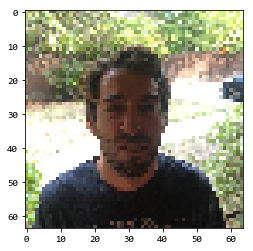

In [46]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

not happy prediction: not happy


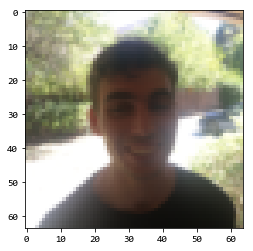

happy prediction: happy


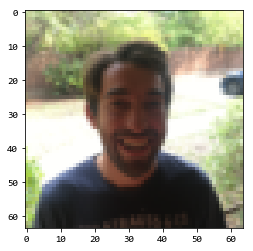

happy prediction: happy


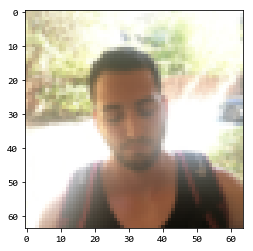

happy prediction: happy


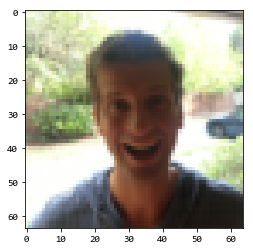

happy prediction: happy


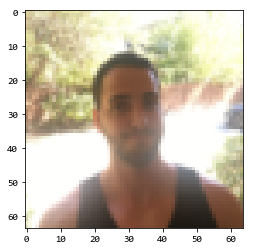

happy prediction: happy


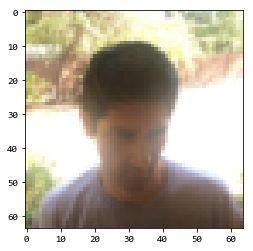

happy prediction: happy


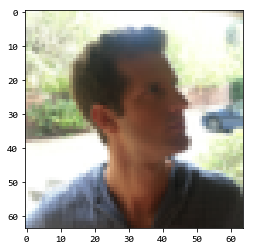

not happy prediction: not happy


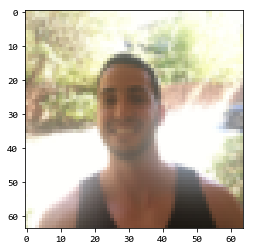

not happy prediction: not happy


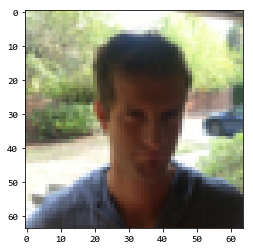

happy prediction: happy


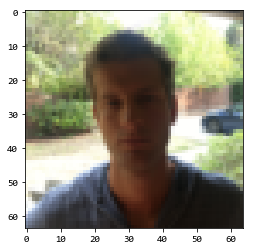

happy prediction: happy


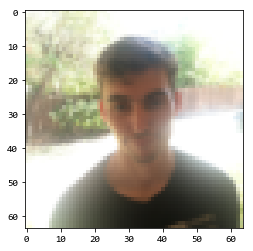

happy prediction: happy


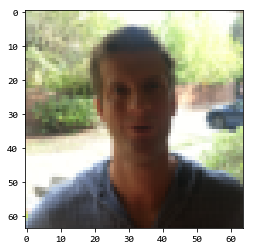

not happy prediction: happy


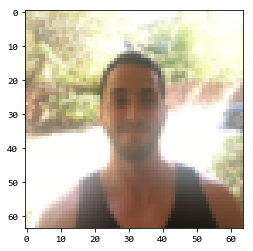

happy prediction: happy


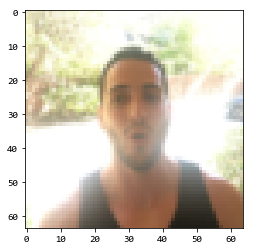

happy prediction: happy


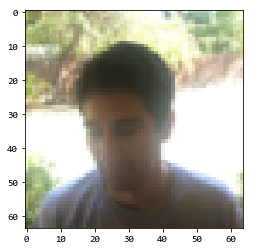

not happy prediction: not happy


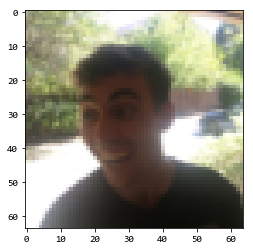

not happy prediction: not happy


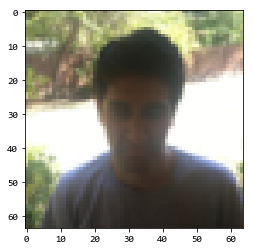

happy prediction: happy


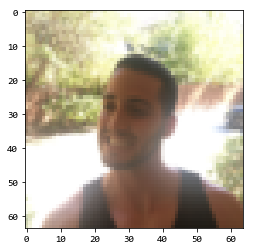

not happy prediction: not happy


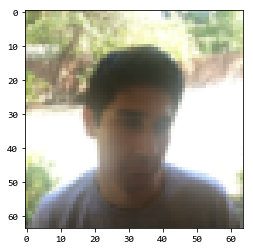

not happy prediction: not happy


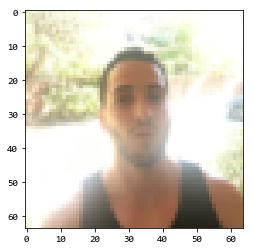

happy prediction: happy


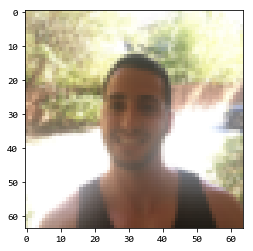

happy prediction: happy


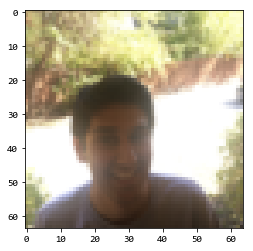

happy prediction: not happy


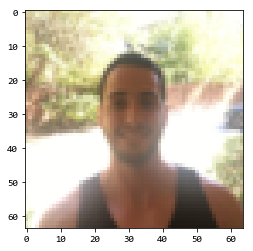

happy prediction: happy


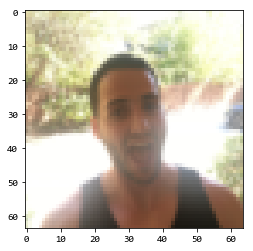

not happy prediction: not happy


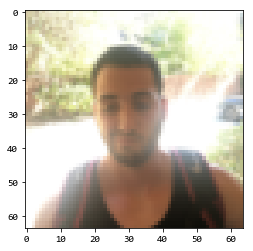

not happy prediction: not happy


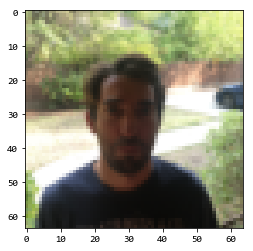

happy prediction: happy


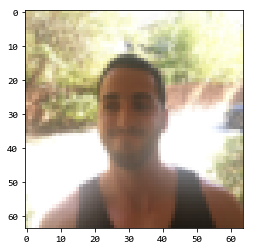

not happy prediction: not happy


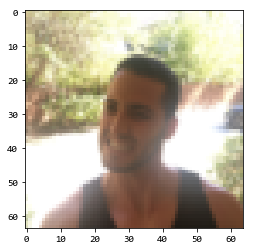

not happy prediction: not happy


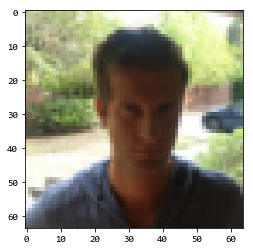

not happy prediction: not happy


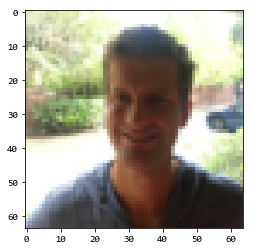

In [72]:
# 对结果进行验证
import random
for idx in random.sample(range(X_test.shape[0]),30):    
    temp_prediction=happyModel.predict(X_test[idx:idx+1])>0.5
    
    print("happy" if  np.squeeze(Y_test_orig)[idx]==1 else "not happy",
          "prediction:","happy" if temp_prediction==1 else "not happy",
         )
    imshow(X_train_orig[idx])
    plt.show()
    

happy prediction: not happy


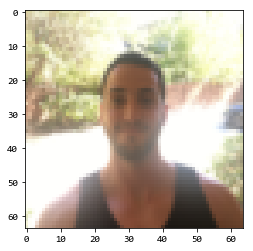

not happy prediction: happy


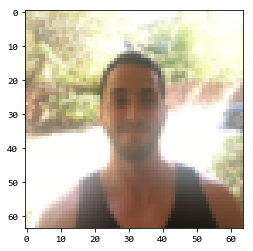

happy prediction: not happy


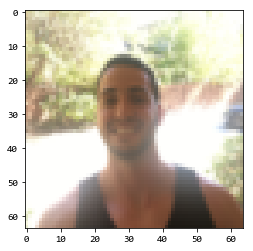

happy prediction: not happy


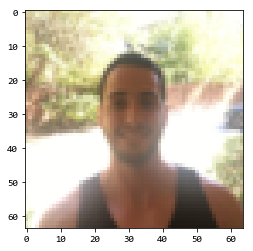

4


In [71]:
# 对结果进行验证
import random
counter=0
for idx in range(X_test.shape[0]):    
    temp_prediction=happyModel.predict(X_test[idx:idx+1])>0.5
    temp_label=np.squeeze(Y_test_orig)[idx]
    if temp_prediction!=temp_label:

        print("happy" if  temp_label==1 else "not happy",
              "prediction:","happy" if temp_prediction==1 else "not happy",
             )
        imshow(X_train_orig[idx])
        plt.show()
        counter+=1
print(counter)    